# Introduction to trend, seasonality, residual

In [3]:
# Install lib before start
!pip install -q statsmodels -U

In [26]:
import numpy as np
import statsmodels as ss
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Section 1: Trend, Seasonality, Residual

**Trend**

In [5]:
Time = np.arange(1,51)

In [7]:
trend = Time*2.25

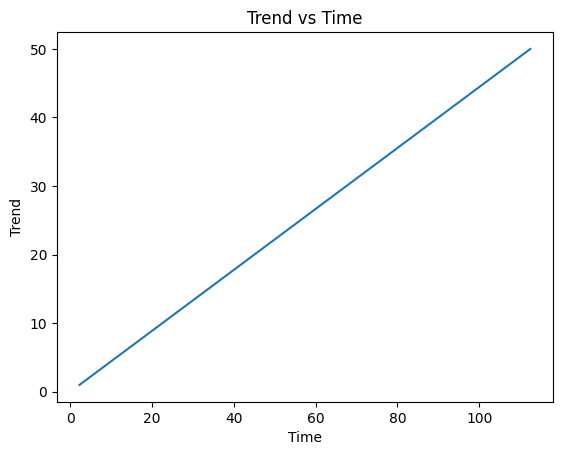

In [10]:
plt.plot(trend, Time)
plt.title("Trend vs Time")
plt.xlabel("Time")
plt.ylabel("Trend")
plt.show()

**Seasonal**

In [16]:
seasonal = 10 + np.sin(Time*(2*np.pi)/6)*10

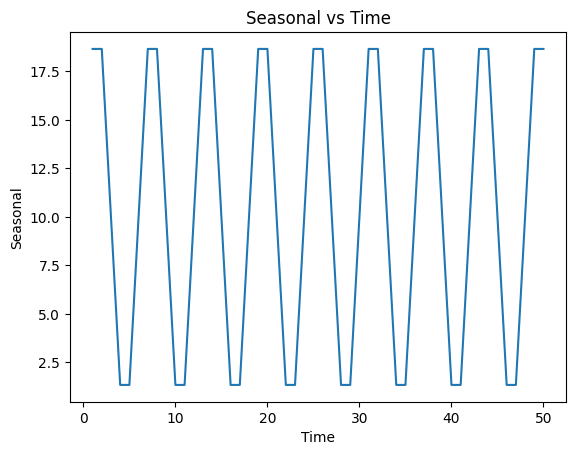

In [17]:
plt.plot(Time,seasonal)
plt.title("Seasonal vs Time")
plt.xlabel("Time")
plt.ylabel("Seasonal")
plt.show()

**Residual**

In [18]:
np.random.seed(10)
residual = np.random.normal(loc=0, scale=1, size=len(Time))

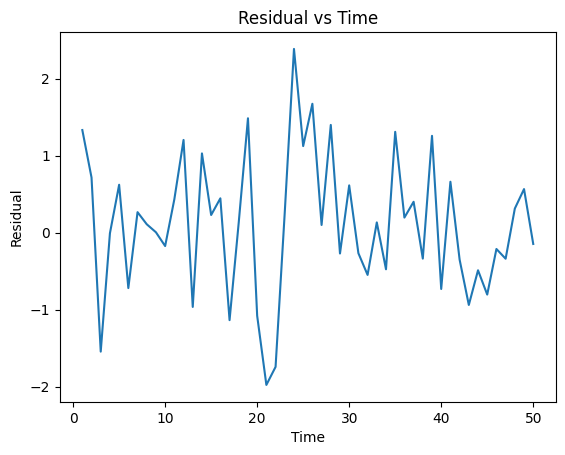

In [19]:
plt.plot(Time,residual)
plt.title("Residual vs Time")
plt.xlabel("Time")
plt.ylabel("Residual")
plt.show()

# Section 2: Aggregation trend, seasonality, residual

In [59]:
outputs = trend + seasonal + residual

Text(0, 0.5, 'electricity demand')

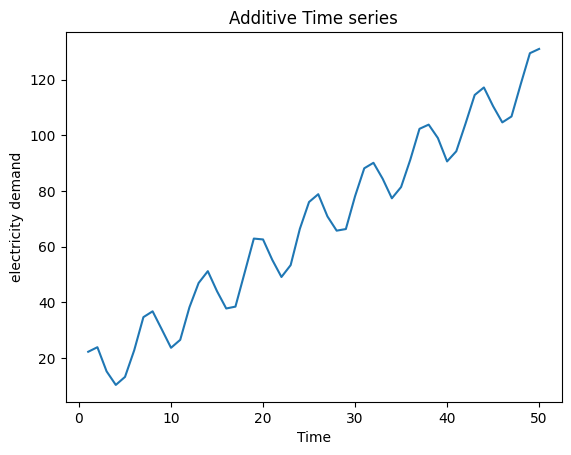

In [60]:
plt.plot(Time, outputs)
plt.title("Additive Time series")
plt.xlabel("Time")
plt.ylabel("electricity demand")

# Multiplicative time series

In [23]:
ignored_residual = np.ones_like(residual)
multiply_ig = trend * seasonal * ignored_residual
multiply_res = trend * seasonal * residual

Text(0, 0.5, 'electricity demand')

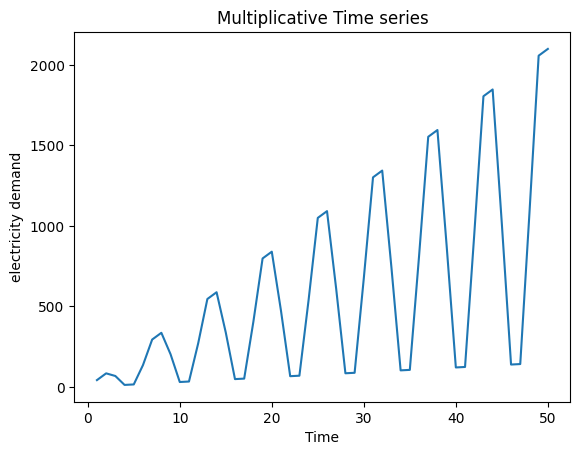

In [24]:
plt.plot(Time, multiply_ig)
plt.title("Multiplicative Time series")
plt.xlabel("Time")
plt.ylabel("electricity demand")

Text(0, 0.5, 'electricity demand')

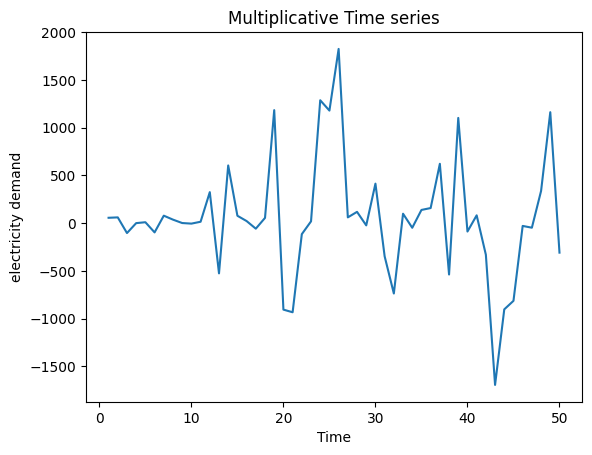

In [25]:
plt.plot(Time, multiply_res)
plt.title("Multiplicative Time series")
plt.xlabel("Time")
plt.ylabel("electricity demand")

# Section 3: Time series
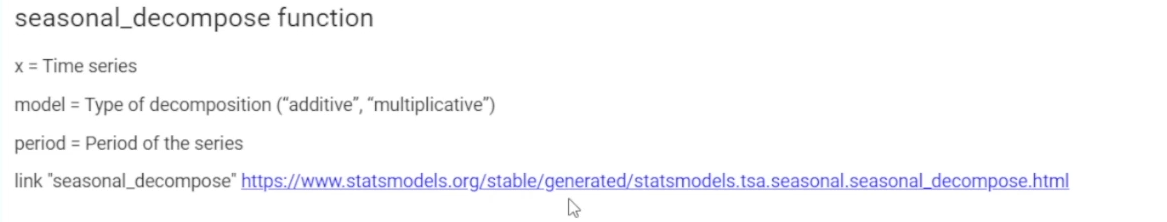

**Additive Decompose**

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [90]:
ss_decompose = seasonal_decompose(x=outputs, model="additive", period=8)
ss_trend = ss_decompose.trend
ss_seasonal = ss_decompose.seasonal
ss_residual = ss_decompose.resid

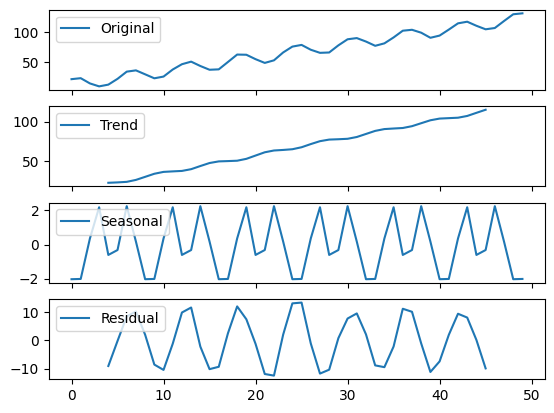

In [91]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)

axes[0].plot(outputs, label="Original")
axes[0].legend(loc="upper left")

axes[1].plot(ss_trend, label="Trend")
axes[1].legend(loc="upper left")

axes[2].plot(ss_seasonal, label="Seasonal")
axes[2].legend(loc='upper left')

axes[3].plot(ss_residual, label="Residual")
axes[3].legend(loc='upper left')
# You will see that seasonal and Residual is look a same so can conclude that
# Your setting is incorrect
# From above period is incorrect

In [92]:
ss_decompose = seasonal_decompose(x=outputs, model="additive", period=6)
ss_trend = ss_decompose.trend
ss_seasonal = ss_decompose.seasonal
ss_residual = ss_decompose.resid

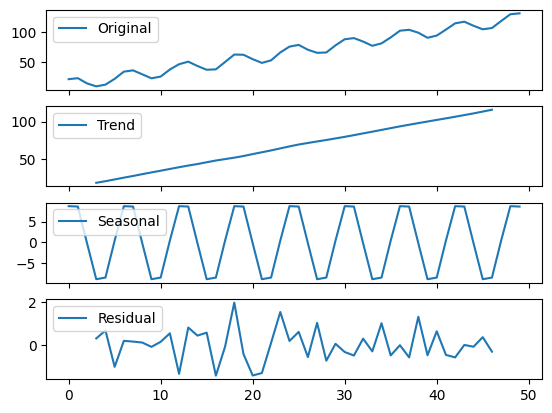

In [93]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)

axes[0].plot(outputs, label="Original")
axes[0].legend(loc="upper left")

axes[1].plot(ss_trend, label="Trend")
axes[1].legend(loc="upper left")

axes[2].plot(ss_seasonal, label="Seasonal")
axes[2].legend(loc='upper left')

axes[3].plot(ss_residual, label="Residual")
axes[3].legend(loc='upper left')


**Multiplicative**

In [94]:
es_decompose = seasonal_decompose(x=multiply_ig, model="multiplicative", period=6)
es_trend= es_decompose.trend
es_seasonal = es_decompose.seasonal
es_residual = es_decompose.resid
# If resdiual have zero values it will error when try to decompose it

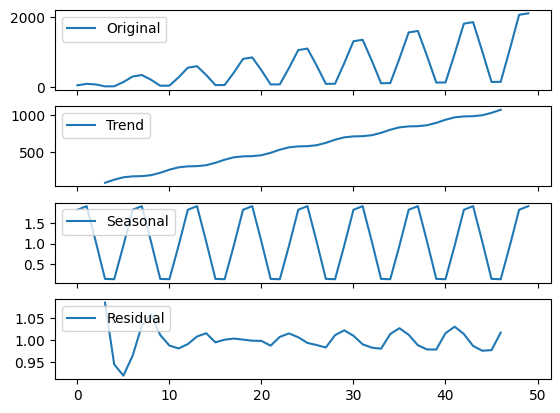

In [95]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)

axes[0].plot(multiply_ig, label="Original")
axes[0].legend(loc="upper left")

axes[1].plot(es_trend, label="Trend")
axes[1].legend(loc="upper left")

axes[2].plot(es_seasonal, label="Seasonal")
axes[2].legend(loc='upper left')

axes[3].plot(es_residual, label="Residual")
axes[3].legend(loc='upper left')


# Testing with real data

In [98]:
!pip install -q kaggle

In [99]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = '/content/'

In [102]:
!chmod 600 /content/kaggle.json

In [103]:
#!/bin/bash
!kaggle datasets download rakannimer/air-passengers

Dataset URL: https://www.kaggle.com/datasets/rakannimer/air-passengers
License(s): DbCL-1.0
air-passengers.zip: Skipping, found more recently modified local copy (use --force to force download)


In [104]:
!unzip air-passengers.zip

Archive:  air-passengers.zip
  inflating: AirPassengers.csv       


In [150]:
df = pd.read_csv("AirPassengers.csv")

In [151]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [152]:
df["Month"] = pd.to_datetime(df["Month"], infer_datetime_format=True)
df.set_index("Month", inplace=True)

/tmp/ipython-input-3659764504.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["Month"] = pd.to_datetime(df["Month"], infer_datetime_format=True)


In [153]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [159]:
df.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


Text(0.5, 1.0, 'Time series dataset')

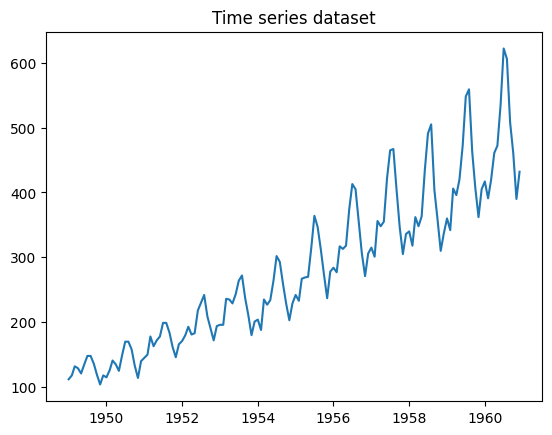

In [154]:
plt.plot(df.index, df["#Passengers"])
plt.title("Time series dataset")

**Can use domain knowledge to determine period or using Auto correlation plot**

In [155]:
from statsmodels.graphics.tsaplots import plot_acf

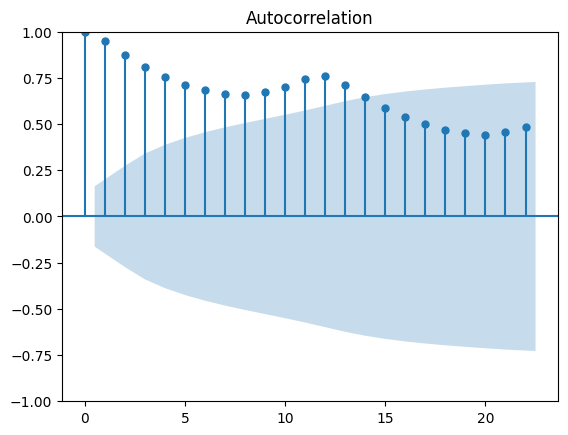

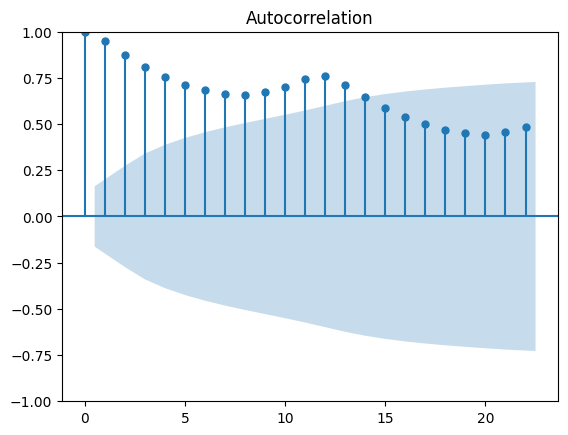

In [156]:
plot_acf(df["#Passengers"])

**The graph spikes at 12, which is similar to 0, suggesting that 12 represents seasonal components.**

In [170]:
threshold = pd.to_datetime("1960-12-01")

In [171]:
df_cleaned = df[df.index <= threshold]

In [190]:
ss_deconpose = seasonal_decompose(x=df_cleaned["#Passengers"], model="multiplicative", period=12)
ss_trend = ss_deconpose.trend
ss_seasonal = ss_deconpose.seasonal
ss_residual = ss_deconpose.resid

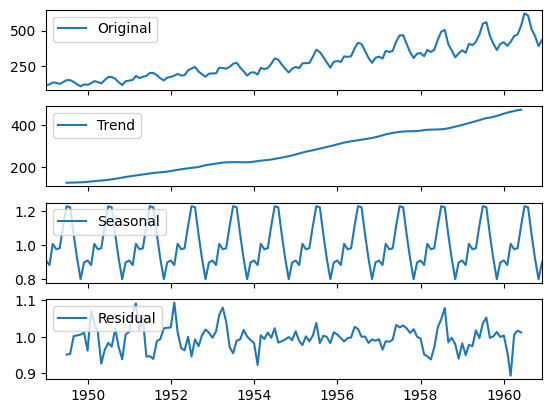

In [191]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)

axes[0].plot(df_cleaned, label="Original")
axes[0].legend(loc="upper left")

axes[1].plot(ss_trend, label="Trend")
axes[1].legend(loc="upper left")

axes[2].plot(ss_seasonal, label="Seasonal")
axes[2].legend(loc='upper left')

axes[3].plot(ss_residual, label="Residual")
axes[3].legend(loc='upper left')

plt.xlim(df.index.min(), df.index.max())
plt.show()